# Energy consumption of the inference of Stable Diffusion
Author: Mathilde Jay    
Date: 04/08/2023

### Summary
- Description of result data
- Analysis of energy consumed
- Analysis of power timeseries
    - by components
    - in total

The results were first processed using the script "process_results.py" : 
```
python utils/process_results.py --analysis_git_dir "/home/mjay/ai-energy-consumption-framework" --result_folder "/home/mjay/laion/pokemon/inference_29_09_sirius"
```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import seaborn as sns
sns.set_theme(style="whitegrid")



## Description of results

In [2]:
files = [
    # "/home/mjay/laion/pokemon/results_12_07/",
    #"/home/mjay/laion/pokemon/results_12_07_adrien/",
    "/home/mjay/laion/pokemon/inference_29_09_sirius/",
]
exp_table = pd.DataFrame()
for f in files:
    table = pd.read_csv(f+"processed_table.csv")
    exp_table = pd.concat([exp_table, table])
    # energy = pd.read_csv(f+"timeseries.csv")
    # energy["exp_table_path"]=f+"processed_table.csv"
    # energy_df = pd.concat([energy_df, energy])

# print(len(exp_table[exp_table["error"].isna()])/len(exp_table))

exp_table.T

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
experiment_start,1695973637.006963,1695973708.998041,1695973748.073627,1695973785.942378,1695973823.675643,1695973861.83584,1695973899.484354,1695973937.067524,1695973974.659639,1695974012.492669,...,1695975940.483765,1695975978.186282,1695976015.905593,1695976053.898689,1695976091.680785,1695976129.187544,1695976166.25997,1695976204.190686,1695976241.614984,1695976279.679
experiment_end,1695973706.772436,1695973746.026649,1695973783.907609,1695973821.616576,1695973859.79195,1695973897.408149,1695973935.027173,1695973972.589353,1695974010.446542,1695974047.882384,...,1695975976.064661,1695976013.844044,1695976051.833951,1695976089.560726,1695976126.768991,1695976164.212978,1695976202.105707,1695976239.526003,1695976277.267003,1695976315.582941
tool_csv_file_nvml,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...
tool_csv_file_rapl,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...
tool_csv_file_sysinfo,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...,/home/mjay/laion/pokemon/inference_29_09_siriu...
tool_energy_consumption(kWh),0.011869,0.006328,0.006145,0.006113,0.006278,0.006188,0.006192,0.006138,0.006254,0.006106,

In [3]:
prompt_csv = exp_table["prompt_csv"].values[0]
prompt_df = pd.read_csv(prompt_csv).drop("Unnamed: 0", axis=1)
prompt_df.tail()

,0
445,hyperrealistic detailed image of a geisha in a...
446,shiny aluminum rocket ship in cosmic space by ...
447,Oil painting - She Eats of the Strangling Frui...
448,award winning emotional heartbreaking full bod...
449,Colour Caravaggio style Photography of Highly ...


In [4]:
def get_prompt(row):
    line = row["prompt_line"]
    prompt = prompt_df.values[line][0]
    return prompt

exp_table["prompt"] = exp_table.apply(get_prompt, axis=1)

In [5]:
exp_table["nb_words_prompt"] = exp_table.apply(lambda row: len(row["prompt"].split(" ")), axis=1)

In [6]:
exp_table["wattmetre_gpu0_inference_energy_consumption(kWh)"] = exp_table["wattmetre_inference_energy_consumption(kWh)"] - exp_table["sensor_inference_energy_consumption(kWh)"] + exp_table["sensor_gpu0_inference_energy_consumption(kWh)"]

## Energy consumed by each experiments
"tool_energy_consumption(kWh)" is the sum of all the energy data - including the sleep times.   
"bench_energy_consumption(kWh)" is the sum of the energy data when removed the sleep times. It's not as precise as having a timestamp of the time at which the training actually starts but I didn't have time to fix this issue.
Below the table is the equivalent in a bar plot, but averaged over seeds.

In [7]:
exp_table.groupby([
       # 'nb_words_prompt', 
       'seed','img_size', 'num_steps']).aggregate(['mean', 'var'])[["sensor_gpu0_inference_energy_consumption(kWh)", "sensor_inference_energy_consumption(kWh)", "wattmetre_gpu0_inference_energy_consumption(kWh)", "wattmetre_inference_energy_consumption(kWh)"]]
       

sensor_gpu0_inference_energy_consumption(kWh)  \
                                                                 mean   
seed img_size num_steps                                                 
41   512      25                                             0.000449   

                                       \
                                  var   
seed img_size num_steps                 
41   512      25         3.561923e-09   

                        sensor_inference_energy_consumption(kWh)  \
                                                            mean   
seed img_size num_steps                                            
41   512      25                                        0.000887   

                                       \
                                  var   
seed img_size num_steps                 
41   512      25         2.054613e-08   

                        wattmetre_gpu0_inference_energy_consumption(kWh)  \
                                                                    mean   
seed img_size num_steps                                                    
41   512      25                                                0.001381   

                                       \
                                  var   
seed img_size num_steps                 
41   512      25         7.466929e-08   

                        wattmetre_inference_energy_consumption(kWh)  \
                                                               mean   
seed img_size num_steps                                               
41   512      25                                           0.001819   

                                       
                                  var  
seed img_size num_steps                
41   512      25         1.187878e-07

In [8]:
exp_table.groupby([
       'nb_words_prompt', 'seed','img_size', 'num_steps']).count()[["wattmetre_gpu0_inference_energy_consumption(kWh)"]]

,,,,wattmetre_gpu0_inference_energy_consumption(kWh)
nb_words_prompt,seed,img_size,num_steps,
32,41,512,25,10
33,41,512,25,10
34,41,512,25,10
35,41,512,25,10
36,41,512,25,10
37,41,512,25,10
38,41,512,25,10


<AxesSubplot:xlabel='nb_words_prompt', ylabel='wattmetre_gpu0_inference_energy_consumption(kWh)'>

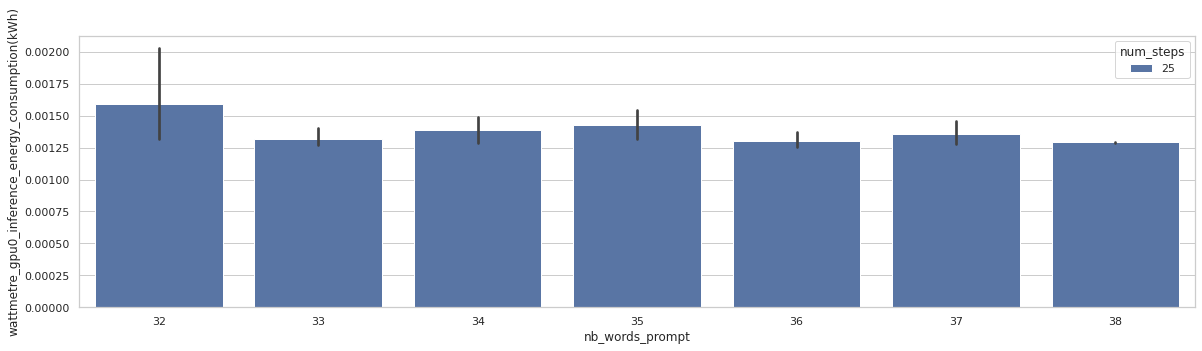

In [9]:
plt.figure(figsize=(20,5))
sns.barplot(x="nb_words_prompt", y="wattmetre_gpu0_inference_energy_consumption(kWh)", hue="num_steps", data=exp_table[exp_table["img_size"]==512])

<AxesSubplot:xlabel='img_size'>

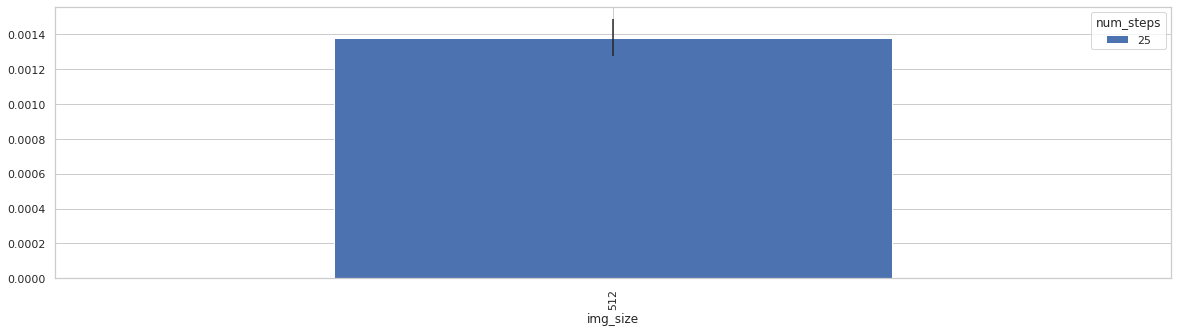

In [10]:
table = exp_table[exp_table["nb_words_prompt"]>5].groupby([
       'nb_words_prompt',
       'num_steps',   
       'img_size',
       ])
table = table.mean()["wattmetre_gpu0_inference_energy_consumption(kWh)"]
table = table.groupby(["img_size", "num_steps"])
table.mean().unstack().plot.bar(
       figsize=(20,5),
       yerr=table.std().unstack(),
       )

In [11]:
table.aggregate(['mean', 'var'])

,,mean,var
img_size,num_steps,,
512,25,0.001381,1.090818e-08


In [12]:
exp_table["inference_duration(sec)"]=(exp_table["inference_end(sec)"]-exp_table["inference_start(sec)"])

<AxesSubplot:xlabel='nb_words_prompt', ylabel='inference_duration(sec)'>

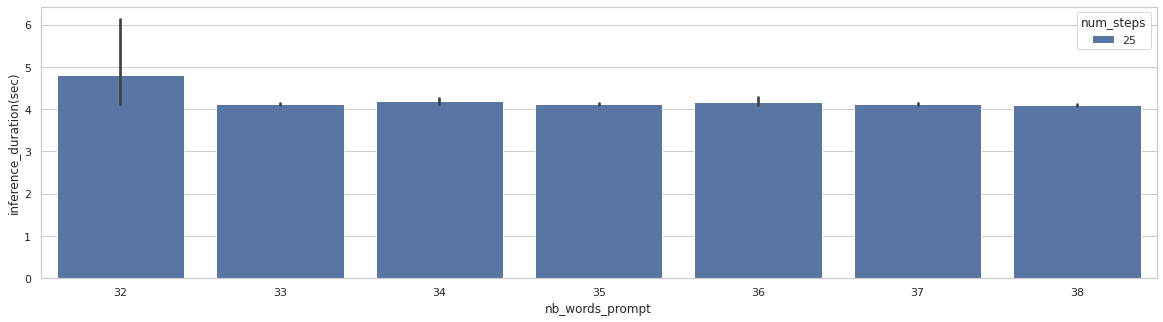

In [13]:
plt.figure(figsize=(20,5))
sns.barplot(x="nb_words_prompt", y="inference_duration(sec)", hue="num_steps", data=exp_table[exp_table["img_size"]==512])

<AxesSubplot:xlabel='img_size'>

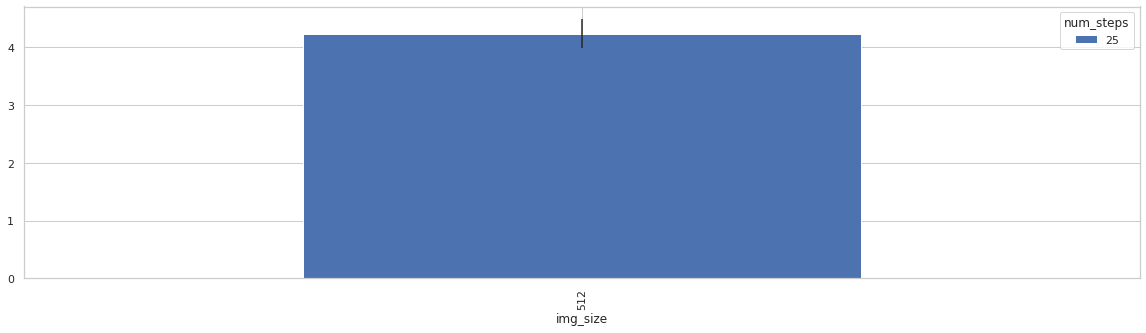

In [14]:
table = exp_table.groupby([
       'nb_words_prompt',
       'num_steps',   
       'img_size',
       ])
table = table.mean()["inference_duration(sec)"]
table = table.groupby(["img_size", "num_steps"])
table.mean().unstack().plot.bar(
       figsize=(20,5),
       yerr=table.std().unstack(),
       )

In [15]:
table.aggregate(['mean', 'var'])

,,mean,var
img_size,num_steps,,
512,25,4.231784,0.063312


In [16]:
table

## Let's have a look at the power time series
To simplify the analysis, I select 1 to 4 experiments to compare.

In [17]:
model_selection = exp_table["model_version"].isin(["v1-1"])
step_selection = exp_table["num_steps"]==25
nb_word_selection = exp_table["nb_words_prompt"]==32
img_selection = exp_table["img_size"]==512
selected_df = exp_table[model_selection][step_selection][img_selection][nb_word_selection]
selected_df[["model_version"]]

,model_version
0,v1-1
1,v1-1
2,v1-1
3,v1-1
4,v1-1
5,v1-1
6,v1-1
7,v1-1
8,v1-1
9,v1-1


#### Code for components

In [18]:
energy_col = "energy_consumption_since_previous_measurement_milliJ"
energy_col = "power(W)"

In [19]:

wattmetre_df = pd.read_csv(f+"g5k_metrics.csv")

In [20]:
energy_df = pd.DataFrame()
for f in files:
    energy = pd.read_csv(f+"timeseries.csv")
    energy["exp_table_path"]=f+"processed_table.csv"
    energy_df = pd.concat([energy_df, energy])
del energy

/home/mjay/.conda/envs/gpu_benchmark/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3186: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1184281 entries, 0 to 1184280
Data columns (total 16 columns):
 #   Column                                                Non-Null Count    Dtype  
---  ------                                                --------------    -----  
 0   timestamp                                             1184281 non-null  int64  
 1   device_index                                          35080 non-null    float64
 2   energy_consumption_since_previous_measurement_milliJ  43850 non-null    float64
 3   instantaneous_power_milliW                            35080 non-null    float64
 4   global_utilization_percent                            35080 non-null    float64
 5   global_memory_percent                                 35080 non-null    float64
 6   timestamp(sec)                                        1184281 non-null  float64
 7   timestamp_origin(sec)                                 1184281 non-null  float64
 8   domain                          

In [22]:
wattmetre_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3936 entries, 0 to 3935
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   timestamp                          3936 non-null   object 
 1   wattmetre_power_watt               3936 non-null   float64
 2   timestamp(sec)                     3936 non-null   float64
 3   wattmetre_energy_consumption(kWh)  3936 non-null   float64
dtypes: float64(3), object(1)
memory usage: 123.1+ KB


#### Code for components

In [23]:

def plot_energy_components(ax, energy_df, index, energy_col, x_col):
    plot_df = energy_df[energy_df["exp_table_index"]==index]
    for label, df in plot_df.groupby(["device_index"]):
        df.plot(
            x=x_col, 
            y=energy_col, 
            ax=ax, 
            label="GPU energy "+str(label),
            )
    for label, df in plot_df.groupby(["domain", "socket"]):
        df.plot(
            x=x_col, 
            y=energy_col, 
            ax=ax, 
            label=label,
            )
    ax.legend(
        bbox_to_anchor=(0.5,-0.1), 
        loc='upper center',
        fontsize=20,
        ncol=2
    )
    ax.set_title(index)
    return ax

#### Code for total energy

In [24]:
def plot_energy_total(ax, energy_df, index, energy_col, x_col):
    plot_df = energy_df[energy_df["exp_table_index"]==index]
    plot_df[(plot_df["device_index"].notna())].groupby([x_col]).sum().plot(
        y=energy_col, 
        ax=ax, 
        label="GPU energy",
        )
    plot_df[(plot_df["domain"]=="Dram")].groupby([x_col]).sum().plot(
        y=energy_col, 
        ax=ax, 
        label="RAM energy",
        )
    plot_df[(plot_df["domain"]=="Package")].groupby([x_col]).sum().plot(
        y=energy_col, 
        ax=ax, 
        label="CPU energy",
        )
    ax.legend(
        bbox_to_anchor=(0.5,-0.1), 
        loc='upper center',
        fontsize=20,
        ncol=2
    )
    ax.set_title("Energy of components")
    return ax
    

#### Code for usage

In [25]:
def plot_utilization(ax, energy_df, index, x_col):
    plot_df = energy_df[energy_df["exp_table_index"]==index]
    plot_df[
        (plot_df["device_index"].notna())
        
        ].plot(x=x_col, y="global_utilization_percent", ax=ax, label="GPU utilization")
    plot_df[
        (plot_df["device_index"].notna())
        ].plot(x=x_col, y="global_memory_percent", ax=ax, label="GPU mem utilization")
    plot_df[
        (plot_df["utilization_percent"].notna())
        ].groupby(x_col).mean().plot(ax=ax, y="utilization_percent", label="CPU avg utilization")
    ax.legend(
        bbox_to_anchor=(0.5,-0.1), 
        loc='upper center',
        fontsize=20,
        ncol=2
    )
    return ax

### Let's plot all this

In [26]:
energy_col = "energy_consumption_since_previous_measurement_milliJ"
energy_col = "power(W)"
timestamp_col="timestamp"

In [27]:
exp_table["inference_start(sec)"]

0     1.695974e+09
1     1.695974e+09
2     1.695974e+09
3     1.695974e+09
4     1.695974e+09
          ...     
65    1.695976e+09
66    1.695976e+09
67    1.695976e+09
68    1.695976e+09
69    1.695976e+09
Name: inference_start(sec), Length: 70, dtype: float64

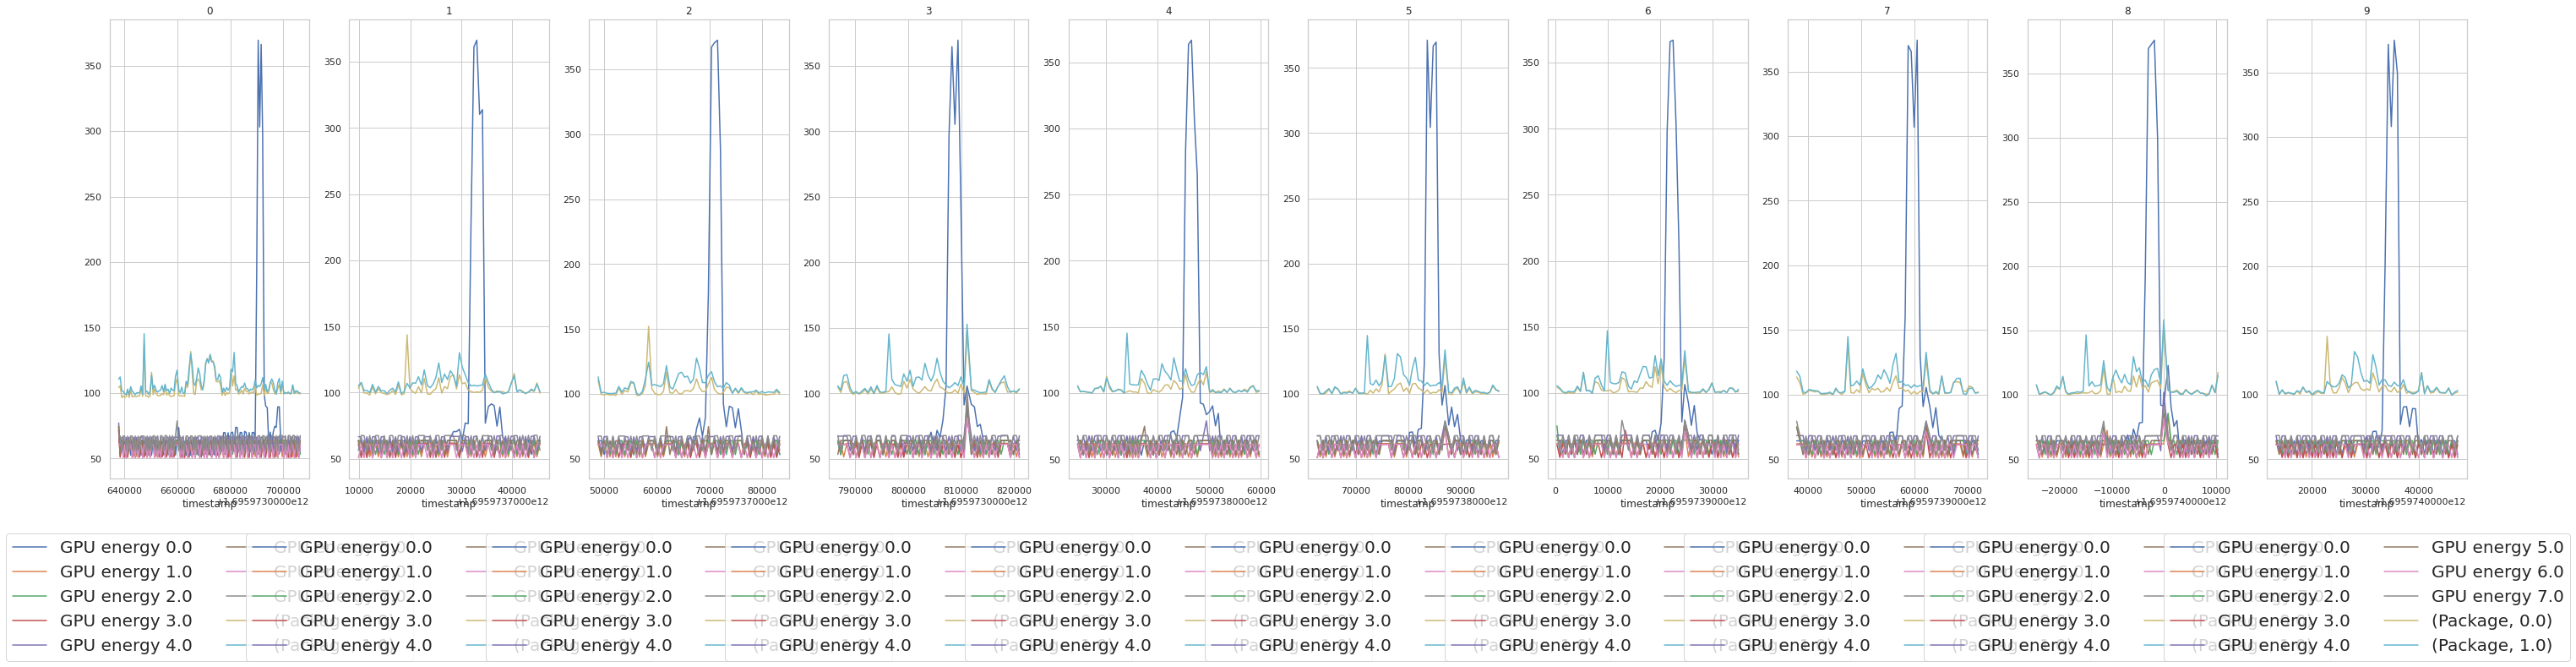

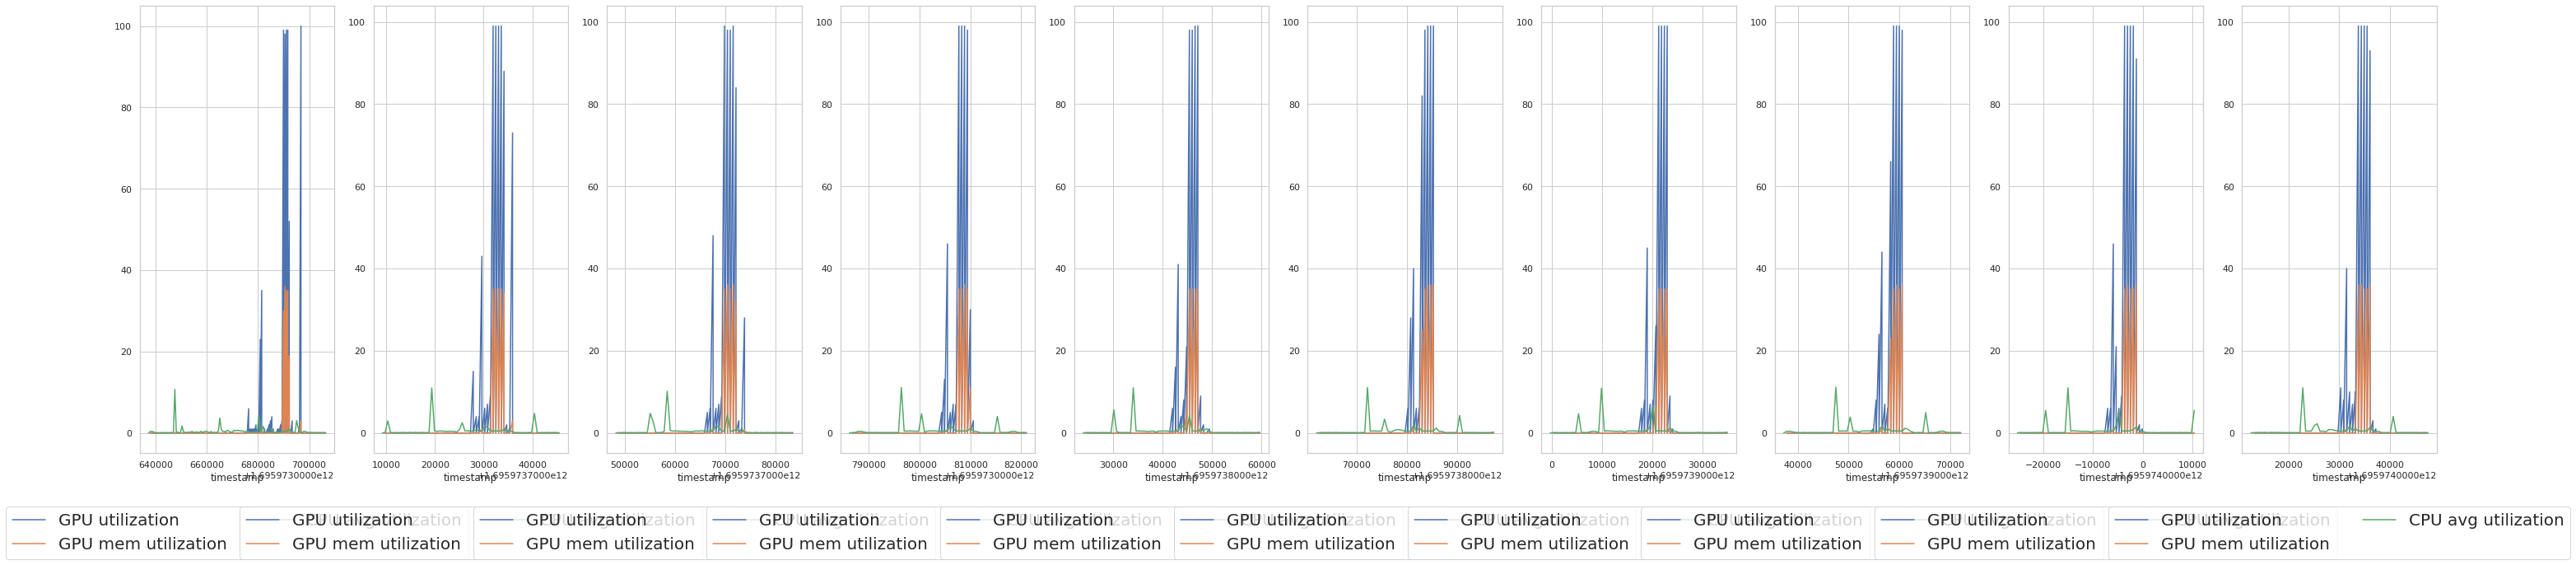

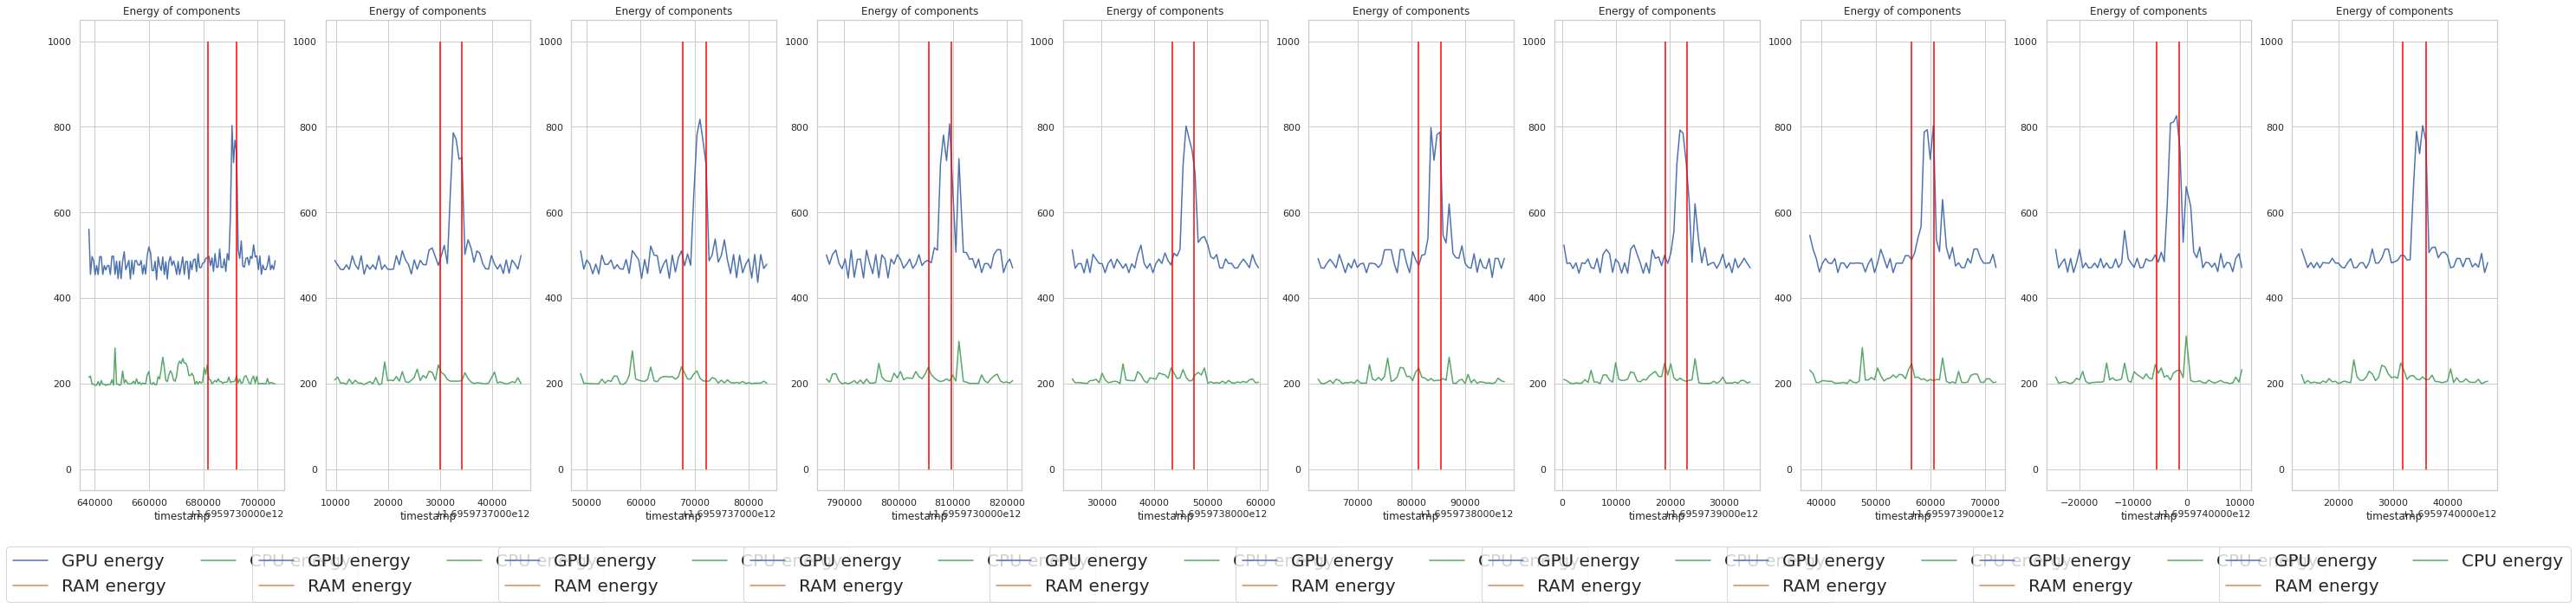

In [28]:
figsize = (50,10)
fig, ax_c = plt.subplots(1, len(selected_df), figsize=figsize)
fig, ax_t = plt.subplots(1, len(selected_df), figsize=figsize)
fig, ax_u = plt.subplots(1, len(selected_df), figsize=figsize)
for i, index in enumerate(selected_df.index):
    ax = plot_energy_components(ax_c[i], energy_df, index, energy_col,timestamp_col)
    ax = plot_utilization(ax_t[i], energy_df, index, timestamp_col)
    ax = plot_energy_total(ax_u[i], energy_df, index, energy_col, timestamp_col)
    
    bench_start = selected_df.loc[index, 'inference_start(sec)']*10**3
    bench_end = selected_df.loc[index, 'inference_end(sec)']*10**3
    ax.vlines(
            x=bench_start, 
            ymin=0, 
            ymax=1000,
            color="red",
            )
    ax.vlines(
            x=bench_end, 
            ymin=0, 
            ymax=1000,
            color="red",
            )
    

Only on GPU is used, so we should try on another plateform with only one GPU. It would be more realistic.

In [29]:
exp_table.columns

Index(['experiment_start', 'experiment_end', 'tool_csv_file_nvml',
       'tool_csv_file_rapl', 'tool_csv_file_sysinfo',
       'tool_energy_consumption(kWh)', 'tool_GPU_energy_consumption(kWh)',
       'tool_CPU_energy_consumption(kWh)', 'tool_RAM_energy_consumption(kWh)',
       'tool_GPU_utilization(percent)', 'tool_CPU_utilization(percent)',
       'tool_GPU_memory_utilization(percent)', 'result_dir', 'tool_name',
       'source_dir', 'period', 'results', 'benchmark_id',
       'execution_script_args.sleep_before',
       'execution_script_args.sleep_after',
       'execution_script_args.benchmark_execution',
       'execution_script_template', 'execution_script_path',
       'tool_args.RESULT_DIR', 'tool_args.INTERNAL_SENSOR_DIR',
       'tool_args.PERIOD', 'job_id', 'exp_id', 'host_name', 'site', 'node',
       'gpu_name', 'gpu_count', 'cpu_name', 'cpu_count',
       'cpu_phyical_core_count', 'experiment_start(sec)',
       'experiment_end(sec)', 'bench_start(sec)', 'bench_end(se

## Remove energy from unused GPUs

In [30]:
[x for x in exp_table.columns if "(sec)" in x]

['experiment_start(sec)',
 'experiment_end(sec)',
 'bench_start(sec)',
 'bench_end(sec)',
 'inference_start(sec)',
 'inference_end(sec)',
 'inference_duration(sec)']

In [31]:
start_msec = exp_table.loc[10, 'experiment_start(sec)']
end_msec = exp_table.loc[10, 'experiment_end(sec)']
bench_df = energy_df[
    (energy_df['timestamp(sec)']>=start_msec)&(energy_df['timestamp(sec)']<=end_msec)
    ].reset_index(
        drop=True
    ).sort_values(
        by=['timestamp(sec)']
    )[['timestamp(sec)', 'energy_consumption_since_previous_measurement(kWh)']].dropna()
total_energy_kWh = bench_df['energy_consumption_since_previous_measurement(kWh)'].sum()

In [32]:
table = energy_df[
    (energy_df['timestamp(sec)']>=start_msec)&(energy_df['timestamp(sec)']<=end_msec)
    ]

In [33]:
table_drop = table.drop(table[table["device_index"].isin(range(1,8))].index)

In [34]:
table_drop

,timestamp,device_index,energy_consumption_since_previous_measurement_milliJ,instantaneous_power_milliW,global_utilization_percent,global_memory_percent,timestamp(sec),timestamp_origin(sec),domain,socket,cpu,utilization_percent,exp_table_index,power(W),energy_consumption_since_previous_measurement(kWh),exp_table_path
167438,1695974047353,0.0,26764.000000,53532.0,0.0,0.0,1.695974e+09,34.679,NaN,NaN,NaN,NaN,9,53.528000,0.000007,/home/mjay/laion/pokemon/inference_29_09_siriu...
167566,1695974047353,NaN,51046.859741,NaN,NaN,NaN,1.695974e+09,34.679,Package,0.0,NaN,NaN,9,102.093719,0.000014,/home/mjay/laion/pokemon/inference_29_09_siriu...
167567,1695974047353,NaN,51684.112549,NaN,NaN,NaN,1.695974e+09,34.679,Package,1.0,NaN,NaN,9,103.368225,0.000014,/home/mjay/laion/pokemon/inference_29_09_siriu...
183184,1695974047353,NaN,NaN,NaN,NaN,NaN,1.695974e+09,34.679,NaN,NaN,cpu0,0.0,9,NaN,NaN,/home/mjay/laion/pokemon/inference_29_09_siriu...
183185,1695974047353,NaN,NaN,NaN,NaN,NaN,1.695974e+09,34.679,NaN,NaN,cpu1,0.0,9,NaN,NaN,/home/mjay/laion/pokemon/inference_29_09_siriu...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199927,1695974084772,NaN,NaN,NaN,NaN,NaN,1.695974e+09,34.675,NaN,NaN,cpu251,0.0,10,NaN,NaN,/home/mjay/laion/pokemon/inference_29_09_siriu...
199928,1695974084772,NaN,NaN,NaN,NaN,NaN,1.695974e+09,34.675,NaN,NaN,cpu252,0.0,10,NaN,NaN,/home/mjay/laion/pokemon/inference_29_09_siriu...
199929,1695974084772,NaN,NaN,NaN,NaN,NaN,1.695974e+09,34.675,NaN,NaN,cpu253,0.0,10,NaN,NaN,/home/mjay/laion/pokemon/inference_29_09_siriu...
199930,1695974084772,NaN,NaN,NaN,NaN,NaN,1.695974e+09,34.675,NaN,NaN,cpu254,0.0,10,NaN,NaN,/home/mjay/laion/pokemon/inference_29_09_siriu...


<AxesSubplot:xlabel='domain', ylabel='energy_consumption_since_previous_measurement(kWh)'>

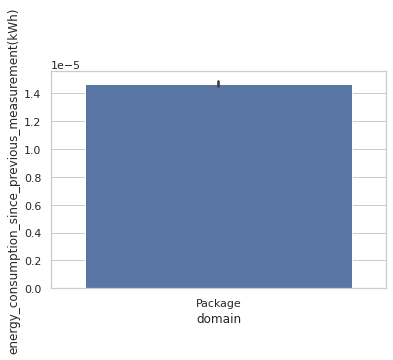

In [35]:
sns.barplot(x="domain", y="energy_consumption_since_previous_measurement(kWh)", data=table_drop)

<AxesSubplot:xlabel='socket', ylabel='energy_consumption_since_previous_measurement(kWh)'>

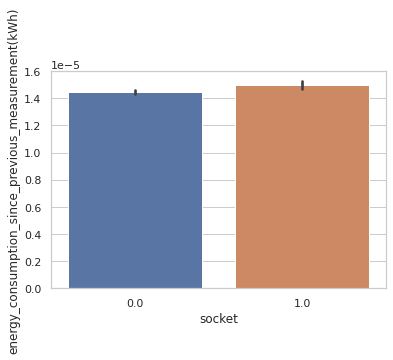

In [36]:
sns.barplot(x="socket", y="energy_consumption_since_previous_measurement(kWh)", data=table_drop)

<AxesSubplot:xlabel='device_index', ylabel='energy_consumption_since_previous_measurement(kWh)'>

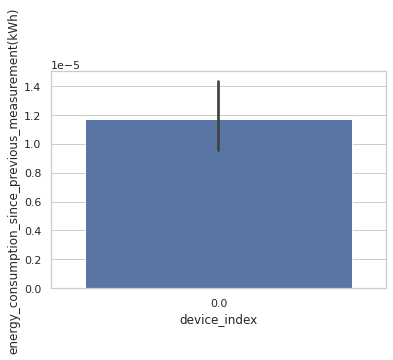

In [37]:
sns.barplot(x="device_index", y="energy_consumption_since_previous_measurement(kWh)", data=table_drop)

<AxesSubplot:xlabel='timestamp(sec)', ylabel='energy_consumption_since_previous_measurement(kWh)'>

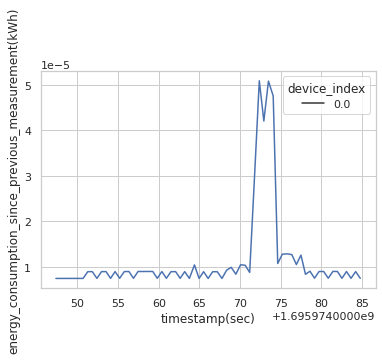

In [38]:
sns.lineplot(x="timestamp(sec)", y="energy_consumption_since_previous_measurement(kWh)", style="device_index", data=table_drop)